# Step 4: Cap Haitien Drive Network Accessibility Analysis for Intersections
The regular driving network will be used for this. There are 8 interections. The analysis will be run with 1 intersection removed at a time. There are also 4 study areas. Also, adding intersection Delays for more realistic modeling.

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
from shapely.geometry import Point

In [119]:
import os, sys

In [120]:
# Get reference to GOSTNets
import sys
sys.path.append(r'C:\repos\GOSTnets')
import GOSTnets as gn

### Load graphs

In [121]:
# original graph
original_G = nx.read_gpickle(r"temp\clipped_cap_haitien_drive_w_ferries_via_osmnx.pickle")

In [122]:
# read back your graphs from step from your saved pickle in Step 2 
G_adv_snap = nx.read_gpickle(r"temp\clipped4_cap_haitien_drive_w_ferries_via_osmnx_w_time_adv_snap.pickle")

In [123]:
G_adv_snap.graph["crs"] = 'epsg:4326'

In [126]:
G_adv_snap_gdf = gn.edge_gdf_from_graph(G_adv_snap)

In [127]:
G_adv_snap_gdf

,stnode,endnode,length,maxspeed,junction,name,orig_length,osmid,highway,ref,mode,access,lanes,ferry,oneway,est_width,bridge,node_ID,geometry
0,330725346,614908804,7.84656,NaN,NaN,Rue 2,43.59200,48413285,unclassified,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,NaN,"LINESTRING (-72.20425 19.75466, -72.20386 19.7..."
1,330725346,614908783,8.76780,NaN,NaN,Rue 2,48.71000,48413285,unclassified,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,NaN,"LINESTRING (-72.20425 19.75466, -72.20468 19.7..."
2,330725346,616793092,9.18774,NaN,NaN,Rue I,51.04300,50759615,residential,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,NaN,"LINESTRING (-72.20425 19.75466, -72.20443 19.7..."
3,330725346,9990000753,6.86526,NaN,NaN,Rue I,38.14031,50759615,residential,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,9990000753_330725346,"LINESTRING (-72.20425 19.75466, -72.20412 19.7..."
4,614908804,616793093,9.09126,NaN,NaN,Rue H,50.50700,48415383,residential,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,NaN,"LINESTRING (-72.20386 19.75451, -72.20402 19.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30997,1110013468,9990006225,25.61212,NaN,NaN,NaN,142.28956,NaN,projected_footway,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,9990006225_1110013468,"LINESTRING (-72.14417 19.68750, -72.14398 19.6..."
30998,1110013469,9990006226,13.76372,NaN,NaN,NaN,76.46512,NaN,projected_footway,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,9990006226_1110013469,"LINESTRING (-72.14000 19.68750, -72.13990 19.6..."
30999,1110013470,9990006227,11.05626,NaN,NaN,NaN,61.42365,NaN,projected_footway,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,9990006227_1110013470,"LINESTRING (-72.13917 19.68750, -72.13906 19.6..."
31000,1110013471,2331361664,5.89835,NaN,NaN,NaN,32.76862,NaN,projected_footway,NaN,drive,NaN,NaN,NaN,False,NaN,NaN,2331361664_1110013471,"LINESTRING (-72.13833 19.68750, -72.13824 19.6..."


In [128]:
if G_adv_snap[1110013471][2331361664][0].get('highway') != 'projected_footway':
    print('do nothing')

In [129]:
gn.example_edge(G_adv_snap,3)

(330725346, 614908804, {'geometry': <shapely.geometry.linestring.LineString object at 0x00000169A5A96730>, 'lanes': nan, 'highway': 'unclassified', 'ref': nan, 'osmid': 48413285, 'oneway': False, 'ferry': nan, 'access': nan, 'length': 7.84656, 'name': 'Rue 2', 'junction': nan, 'est_width': nan, 'bridge': nan, 'maxspeed': nan, 'node_ID': nan, 'orig_length': 43.592, 'mode': 'drive'})
(330725346, 614908783, {'geometry': <shapely.geometry.linestring.LineString object at 0x00000169A5A96760>, 'lanes': nan, 'highway': 'unclassified', 'ref': nan, 'osmid': 48413285, 'oneway': False, 'ferry': nan, 'access': nan, 'length': 8.767800000000001, 'name': 'Rue 2', 'junction': nan, 'est_width': nan, 'bridge': nan, 'maxspeed': nan, 'node_ID': nan, 'orig_length': 48.71, 'mode': 'drive'})
(330725346, 616793092, {'geometry': <shapely.geometry.linestring.LineString object at 0x00000169A5A96790>, 'lanes': nan, 'highway': 'residential', 'ref': nan, 'osmid': 50759615, 'oneway': False, 'ferry': nan, 'access': na

## Adding delays to interesections for more realistic modeling

In [130]:
%%time
G_adv_snap = gn.add_intersection_delay(G_adv_snap, intersection_delay=10, time_col = 'length', highway_col='highway')

Wall time: 423 ms


In [131]:
G_adv_snap[9990000775][330736361]

AtlasView({0: {'geometry': <shapely.geometry.linestring.LineString object at 0x00000169A5A75700>, 'lanes': nan, 'highway': ['unclassified', 'residential'], 'ref': nan, 'osmid': [50732744, 48413285], 'oneway': False, 'ferry': nan, 'access': nan, 'length': 16.94855515652403, 'name': 'Rue 2', 'junction': nan, 'est_width': nan, 'bridge': nan, 'maxspeed': nan, 'node_ID': '9990000775_330736361', 'orig_length': 38.60308420291127, 'mode': 'drive'}})

## Clip graphs by study areas

In [132]:
study_areas = gpd.read_file(r"input_folder\study_areas_cap_haitien.shp")

In [133]:
study_areas

,id,study_area,label,geometry
0,1,1,study area 1,"POLYGON ((-72.24445 19.73450, -72.21215 19.734..."
1,2,2,study area 2,"POLYGON ((-72.19751 19.73470, -72.16521 19.734..."
2,3,3,study area 3,"POLYGON ((-72.22115 19.76566, -72.18885 19.765..."


In [134]:
graph_dict = {}

1
POLYGON ((-72.2444506118478 19.73450362198486, -72.21215446032286 19.73408084220231, -72.21245408251659 19.71119270003464, -72.24475023404152 19.71161547981719, -72.2444506118478 19.73450362198486))


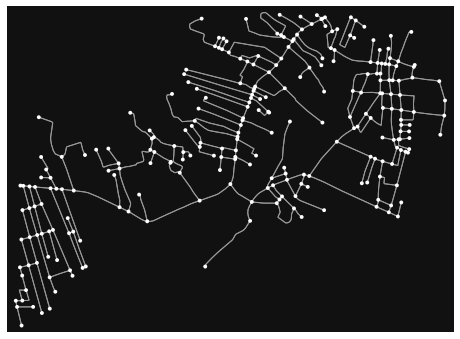

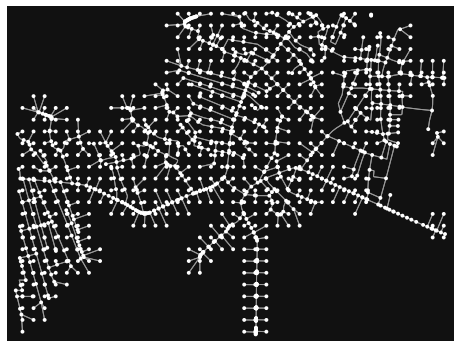

2
POLYGON ((-72.19750895212886 19.73470125624382, -72.16521280060392 19.73427847646127, -72.16551242279765 19.7113903342936, -72.19780857432258 19.71181311407614, -72.19750895212886 19.73470125624382))


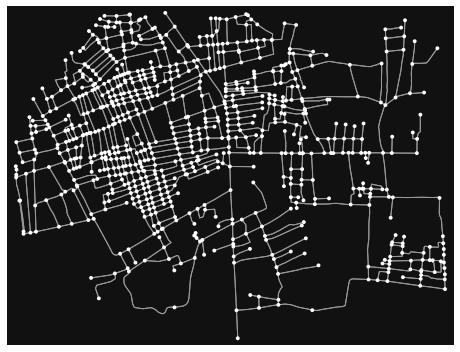

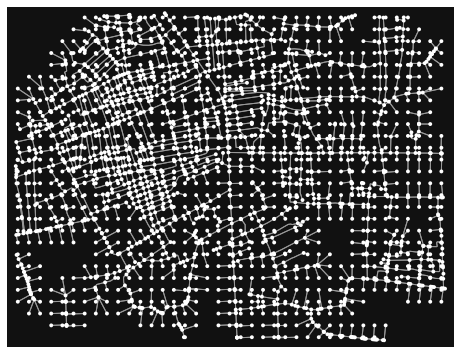

3
POLYGON ((-72.22115071893539 19.76565764301543, -72.18885456741046 19.76523486323289, -72.18915418960418 19.74234672106521, -72.22145034112911 19.74276950084776, -72.22115071893539 19.76565764301543))


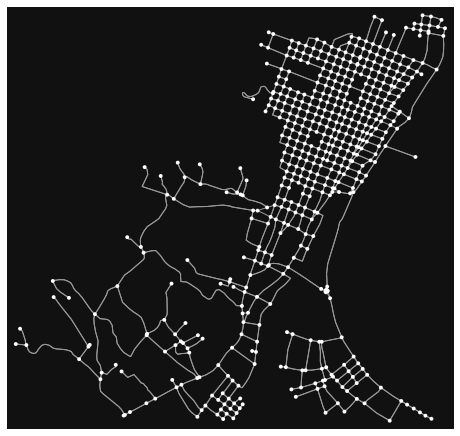

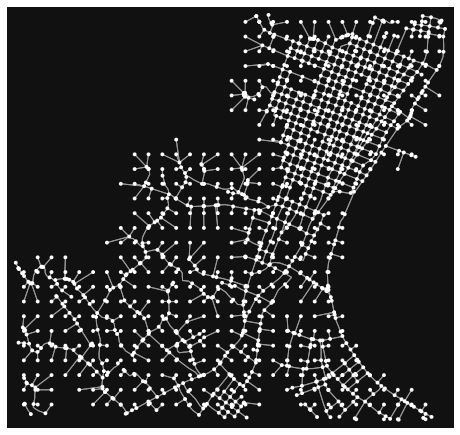

In [135]:
for index,rows in study_areas.iterrows():
    print(rows.study_area)
    print(rows.geometry)
    #https://stackoverflow.com/questions/60268145/clipping-a-networkx-graph-according-to-georeferenced-polygon/60271297#60271297
    nodes = ox.graph_to_gdfs(original_G, edges=False)
    intersecting_nodes = nodes[nodes.intersects(rows.geometry)].index
    G_sub1 = original_G.subgraph(intersecting_nodes)
    G_sub_copy1 = G_sub1.copy()
    G_sub_copy1.remove_nodes_from(list(nx.isolates(G_sub1)))
    fig, ax = ox.plot_graph(G_sub_copy1)
    
    # clip G_adv_snap
    nodes = ox.graph_to_gdfs(G_adv_snap, edges=False)
    intersecting_nodes = nodes[nodes.intersects(rows.geometry)].index
    G_sub2 = G_adv_snap.subgraph(intersecting_nodes)
    G_sub_copy2 = G_sub2.copy()
    G_sub_copy2.remove_nodes_from(list(nx.isolates(G_sub2)))
    fig, ax = ox.plot_graph(G_sub_copy2)
    
    graph_dict[f"study_area{rows.study_area}"] = {"original_G": G_sub_copy1, "G_adv_snap": G_sub_copy2}
    

In [136]:
graph_dict

{'study_area1': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x1699a742e20>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699d9be7f0>},
 'study_area2': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a7b2ef40>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x169a87b9130>},
 'study_area3': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a1953c10>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699cb88fa0>}}

## Load Data

In [137]:
# load destinations
health_destinations = gpd.read_file(r"input_folder\clipped_cap_haitien_health_pts2.shp")
school_destinations = gpd.read_file(r"input_folder\clipped_cap_haitien_schools_DPCE_20180709.shp")
market_destinations = gpd.read_file(r"input_folder\clipped_cap_haitien_markets.shp")
#shops_and_amenities = gpd.read_file(r"output_folder\osm_infrastructure\osm_shops_and_amenities.shp")

In [138]:
destinations_dict = {'health_destinations': health_destinations, 'school_destinations': school_destinations, 'market_destinations': market_destinations}

In [139]:
#health_destinations

### Load Origins this way because using Advanced Snapping

In [140]:
# read in origin_nodes
originNodes = gpd.read_file(r"temp/clipped_origin_nodes_drive4.csv", GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

C:\Users\war-machine\anaconda3\envs\gostnets3_8\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [141]:
originNodes['node_ID'] = pd.to_numeric(originNodes['node_ID'])
originNodes['VALUE'] = pd.to_numeric(originNodes['VALUE'])

In [142]:
originNodes_list = list(originNodes['node_ID'])

In [143]:
list(original_G.nodes()).count(619343506)

1

In [144]:
list(G_adv_snap.nodes()).count(619343506)

1

In [145]:
originNodes_list.count(619343506)

0

## Add intersections to graph_dict

In [146]:
#remove an intersection
# list of nodes at intersections to be disrupted: 
# intersection 1:330736841
# intersection 2:330728809, 
# intersection 3: 330732251
# intersection 4 (round-a-bout):3448438117,1877907987,3448438127, 3448438124, 3448438116, 3448438112
# intersection 5: 614617135
# intersection 6: 330730341
# intersection 7: 614934354
# intersection 8: 646749059

In [147]:
graph_dict['study_area1']['intersections'] = ['intersection_1']
graph_dict['study_area2']['intersections'] = ['intersection_2','intersection_3']
graph_dict['study_area3']['intersections'] = ['intersection_4','intersection_5','intersection_6','intersection_7','intersection_8']

In [148]:
graph_dict

{'study_area1': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x1699a742e20>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699d9be7f0>,
  'intersections': ['intersection_1']},
 'study_area2': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a7b2ef40>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x169a87b9130>,
  'intersections': ['intersection_2', 'intersection_3']},
 'study_area3': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a1953c10>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699cb88fa0>,
  'intersections': ['intersection_4',
   'intersection_5',
   'intersection_6',
   'intersection_7',
   'intersection_8']}}

In [149]:
# also make an intersection_dict
intersection_dict = {"intersection_1":330736841,"intersection_2":330728809,"intersection_3":330732251,"intersection_4":[3448438117, 1877907987, 3448438127, 3448438124, 3448438116, 3448438112,],"intersection_5":614617135,"intersection_6":330730341,"intersection_7":614934354,"intersection_8":646749059}

### Define analyze_accessibility function

In [178]:
def analyze_accessibility(original_G, G_adv_snap, originNodes_list_filtered, bounding_box, key, intersection, filter_origins=None):
    #print(intersection)
    
    d = {'study_area':[],'label_intersection':[],'label_destination':[],'avg_travel_time_minutes':[],'num_failed_routes':[]}
    
    for destination in destinations_dict.items():

        # only include destinations within bounding box
        clipped_destinations = destination[1][destination[1].intersects(bounding_box)]
        
        # how many subgraphs?
        

        # snap the destinations to the road graph
        snapped_destinations = gn.pandana_snap(original_G, clipped_destinations, source_crs = 'epsg:4326', target_crs = 'epsg:32619')
        destinationsNodes = list(snapped_destinations['NN'].unique())
        #print("print destinationsNodes")
        print(f"destinationsNodes count: {len(destinationsNodes)}")
        #print(f"count of 1110006405 in destinationsNodes: {destinationsNodes.count(1110006405)}")
        #print(originNodes_list_filtered)
        
        # Calculate OD Matrix
        OD_matrix = gn.calculate_OD(G_adv_snap, originNodes_list_filtered, destinationsNodes, fail_value=999999, weight='length')

        OD_df = pd.DataFrame(OD_matrix, columns = destinationsNodes, index = originNodes_list_filtered)
        
#         if intersection == 3448438112:
#             return OD_df
               
        closest_facility_per_origin = OD_df.min(axis=1)
        #closest_facility_per_origin_labels = OD_df.idxmin(axis=1)
        #print(f"closest_facility_per_origin_labels: {closest_facility_per_origin_labels}")
        
        results = pd.DataFrame([originNodes_list_filtered, closest_facility_per_origin]).transpose()
        colName = "travel_time_to_closest_facility"
        results.columns = ['NN', colName]
        
        #return results
        print(f"number of routes: {results['travel_time_to_closest_facility'].count()}")
        failed_routes = (results['travel_time_to_closest_facility'] == 999999).sum()
        
#         if failed_routes > 300:
#             return results
        
        print(f"number of failed routes: {failed_routes}")
        #print(results[results['travel_time_to_closest_facility'] == 999999])
        
        if filter_origins is not None:
            results = results[results.index.isin(filter_origins)]
        
        filter_out_failed_results_OD = results[results.travel_time_to_closest_facility < 999999.0]
        print(f"number of successful routes: {(results['travel_time_to_closest_facility'] < 999999).sum()}")
        
        avg_trip_time = filter_out_failed_results_OD['travel_time_to_closest_facility'].mean()

        print(f"average trip time for {destination[0]} with the {intersection} graph is: {avg_trip_time/60} minutes")
        
        d['study_area'].append(f'{key}')
        d['label_intersection'].append(f'{intersection}')
        d['label_destination'].append(f'{destination[0]}')
        d['avg_travel_time_minutes'].append(f'{avg_trip_time/60}')
        d['num_failed_routes'].append(f'{failed_routes}')
        
    return d, filter_out_failed_results_OD.index

### Loop through each intersection and analyze the accessibility for each type of destination

In [179]:
graph_dict

{'study_area1': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x1699a742e20>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699d9be7f0>,
  'intersections': ['intersection_1']},
 'study_area2': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a7b2ef40>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x169a87b9130>,
  'intersections': ['intersection_2', 'intersection_3']},
 'study_area3': {'original_G': <networkx.classes.multidigraph.MultiDiGraph at 0x169a1953c10>,
  'G_adv_snap': <networkx.classes.multidigraph.MultiDiGraph at 0x1699cb88fa0>,
  'intersections': ['intersection_4',
   'intersection_5',
   'intersection_6',
   'intersection_7',
   'intersection_8']}}

In [180]:
def merge_d(new_d):
    d['study_area'] = d['study_area'] + new_d['study_area']
    d['label_intersection'] = d['label_intersection'] + new_d['label_intersection']
    d['label_destination'] = d['label_destination'] + new_d['label_destination']
    d['avg_travel_time_minutes'] = d['avg_travel_time_minutes'] + new_d['avg_travel_time_minutes']
    d['num_failed_routes'] = d['num_failed_routes'] + new_d['num_failed_routes']

In [181]:
d = {'study_area':[],'label_intersection':[],'label_destination':[],'avg_travel_time_minutes':[],'num_failed_routes':[]}
count = 0
for key in graph_dict:
#     count += 1
#     if count > 2:
#         break
    #print(key[-1])
    #print(type(key[-1]))
    #print(study_areas.loc[study_areas['id'] == int(key[-1])].geometry.iloc[0])
    bounding_box = study_areas.loc[study_areas['id'] == int(key[-1])].geometry.iloc[0]
    print(key)
    for intersection in graph_dict[key]['intersections']:
        print(intersection)
        if isinstance(intersection_dict[intersection],list):
            G_adv_snap_copy = graph_dict[key]['G_adv_snap'].copy()
            original_G_copy = graph_dict[key]['original_G'].copy()
            #print(intersection_dict[intersection])
            for node in intersection_dict[intersection]:
                print(node)
                G_adv_snap_copy.remove_node(node)
                # also modify original_G so destination nodes won't snap to a node that will get deleted
                original_G_copy.remove_node(node)
                
            originNodes_list_filtered = [x for x in originNodes_list if x in list(G_adv_snap_copy.nodes)]
            print(f"original_G_copy node count is: {len(list(original_G_copy.nodes()))}")
            
            #test_original_G_copy=original_G_copy
            test_G_adv_snap_copy=G_adv_snap_copy
            
            # continue with accessibility analysis disrupted graph
            add_to_d, filter_out_failed_results_OD_index = analyze_accessibility(original_G_copy, G_adv_snap_copy, originNodes_list_filtered, bounding_box, key, intersection = intersection)
            merge_d(add_to_d)
            
            # continue with accessibility analysis original graph
            add_to_d, filter_out_failed_results_OD_index = analyze_accessibility(original_G_copy, graph_dict[key]['G_adv_snap'], originNodes_list_filtered, bounding_box, key, intersection = intersection+"_original", filter_origins=filter_out_failed_results_OD_index)
            merge_d(add_to_d)
            
            
        else:
            G_adv_snap_copy = graph_dict[key]['G_adv_snap'].copy()
            original_G_copy = graph_dict[key]['original_G'].copy()
            print(intersection_dict[intersection])
            G_adv_snap_copy.remove_node(intersection_dict[intersection])
            original_G_copy.remove_node(intersection_dict[intersection])
            originNodes_list_filtered = [x for x in originNodes_list if x in list(G_adv_snap_copy.nodes)]
            print(f"original_G_copy node count is: {len(list(original_G_copy.nodes()))}")
            
            test2_G_adv_snap_copy=G_adv_snap_copy
            
            # continue with accessibility analysis disrupted graph
            add_to_d, filter_out_failed_results_OD_index = analyze_accessibility(original_G_copy, G_adv_snap_copy, originNodes_list_filtered, bounding_box, key, intersection = intersection)
            #print(add_to_d)
            merge_d(add_to_d)
            
            print("print filter_out_failed_results_OD_index")
            print(filter_out_failed_results_OD_index)
            
            # continue with accessibility analysis original graph
            add_to_d, filter_out_failed_results_OD_index = analyze_accessibility(original_G_copy, graph_dict[key]['G_adv_snap'], originNodes_list_filtered, bounding_box, key, intersection = intersection+"_original", filter_origins=filter_out_failed_results_OD_index)
            #print(add_to_d)
            merge_d(add_to_d)
            
            
            

study_area1
intersection_1
330736841
original_G_copy node count is: 257
destinationsNodes count: 5
number of routes: 593
number of failed routes: 11
number of successful routes: 582
average trip time for health_destinations with the intersection_1 graph is: 5.589329014104213 minutes
destinationsNodes count: 37
number of routes: 593
number of failed routes: 11
number of successful routes: 582
average trip time for school_destinations with the intersection_1 graph is: 2.9750944345340864 minutes
destinationsNodes count: 1
number of routes: 593
number of failed routes: 381
number of successful routes: 212
average trip time for market_destinations with the intersection_1 graph is: 6.378812542425083 minutes
print filter_out_failed_results_OD_index
Int64Index([149, 150, 151, 152, 176, 177, 178, 179, 180, 181,
            ...
            571, 572, 573, 577, 578, 579, 583, 584, 585, 589],
           dtype='int64', length=212)
destinationsNodes count: 5
number of routes: 593
number of failed rou

destinationsNodes count: 1
number of routes: 523
number of failed routes: 11
number of successful routes: 512
average trip time for market_destinations with the intersection_6 graph is: 7.263017499442551 minutes
print filter_out_failed_results_OD_index
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            513, 514, 515, 516, 517, 518, 519, 520, 521, 522],
           dtype='int64', length=512)
destinationsNodes count: 11
number of routes: 523
number of failed routes: 11
number of successful routes: 512
average trip time for health_destinations with the intersection_6_original graph is: 2.1346983576870096 minutes
destinationsNodes count: 115
number of routes: 523
number of failed routes: 11
number of successful routes: 512
average trip time for school_destinations with the intersection_6_original graph is: 0.8522455615678555 minutes
destinationsNodes count: 1
number of routes: 523
number of failed routes: 11
number of successful routes: 512
average tri

In [182]:
d

{'study_area': ['study_area1',
  'study_area1',
  'study_area1',
  'study_area1',
  'study_area1',
  'study_area1',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area2',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3',
  'study_area3'],
 'label_intersection': ['intersection_1',
  'intersection_1',
  'intersection_1',
  'intersection_1_original',
  'intersection_1_original',
  'intersection_1_original',


In [183]:
d_df = pd.DataFrame(d)

# save a CSV of Table
d_df.to_csv(fr"output_folder\intersection_table_cap_haitien_accessibility_adv_snap_20210825_filter7.csv")